
BFS Results:
Shortest Path: [(0, 0), (0, 1), (1, 1), (2, 1), (2, 2), (2, 3), (3, 3), (4, 3), (4, 4), (4, 5), (5, 5)]
Nodes Explored: 16


C:\Users\KIIT\AppData\Local\Temp\ipykernel_16120\85458750.py:76: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap('viridis', 3)  # 3 unique colors (0, 1, 2)


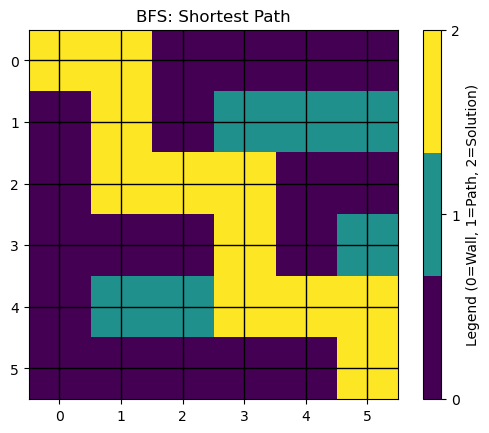


DFS Results:
One Valid Path: [(0, 0), (0, 1), (1, 1), (2, 1), (2, 2), (2, 3), (3, 3), (4, 3), (4, 4), (4, 5), (5, 5)]
Nodes Explored: 17


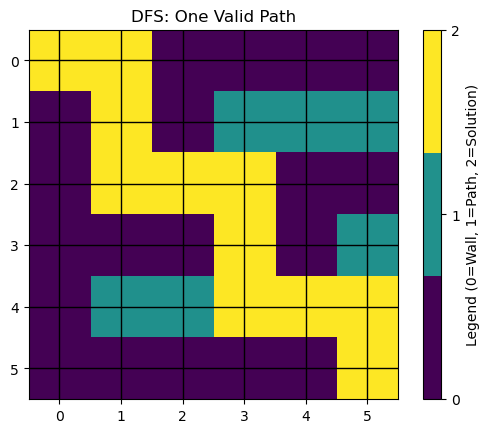


Comparison:
BFS Nodes Explored: 16
DFS Nodes Explored: 17


In [19]:
""" Objective: Implement BFS and DFS to solve a maze.

Problem Statement: Given a grid-based maze where 0 represents walls and 1 represents walkable paths, 
find the shortest path from a start cell to an end cell.

Tasks:
1.Use BFS to find the shortest path.
2.Use DFS to explore all possible paths and report one valid path (not necessarily the shortest).
3. Compare the number of nodes explored by BFS and DFS."""

from collections import deque
import matplotlib.pyplot as plt
import numpy as np


DIRECTIONS = [(0, 1), (0, -1), (1, 0), (-1, 0)]

def is_valid_move(x, y, maze, visited):
    rows, cols = len(maze), len(maze[0])
    return 0 <= x < rows and 0 <= y < cols and maze[x][y] == 1 and not visited[x][y]

def bfs_maze_solver(maze, start, end):
    rows, cols = len(maze), len(maze[0])
    visited = [[False] * cols for _ in range(rows)]
    queue = deque([(start, [start])])  
    visited[start[0]][start[1]] = True
    nodes_explored = 0

    while queue:
        (x, y), path = queue.popleft()
        nodes_explored += 1

        if (x, y) == end:
            return path, nodes_explored 

        for dx, dy in DIRECTIONS:
            nx, ny = x + dx, y + dy
            if is_valid_move(nx, ny, maze, visited):
                visited[nx][ny] = True
                queue.append(((nx, ny), path + [(nx, ny)]))

    return [], nodes_explored  

def dfs_maze_solver(maze, start, end):
    rows, cols = len(maze), len(maze[0])
    visited = [[False] * cols for _ in range(rows)]
    stack = [(start, [start])]  
    nodes_explored = 0

    while stack:
        (x, y), path = stack.pop()
        nodes_explored += 1

        if (x, y) == end:
            return path, nodes_explored 

        if not visited[x][y]:
            visited[x][y] = True
            for dx, dy in DIRECTIONS:
                nx, ny = x + dx, y + dy
                if is_valid_move(nx, ny, maze, visited):
                    stack.append(((nx, ny), path + [(nx, ny)]))

    return [], nodes_explored  


def visualize_maze(maze, path, title):
    rows, cols = len(maze), len(maze[0])
    maze_visual = np.array(maze)
    
   
    for x, y in path:
        maze_visual[x][y] = 2 
    
    
    cmap = plt.cm.get_cmap('viridis', 3) 
    plt.imshow(maze_visual, cmap=cmap, interpolation='nearest')
    
    
    plt.xticks(range(cols))
    plt.yticks(range(rows))
    plt.grid(color='black', linestyle='-', linewidth=1)
    
  
    plt.title(title)
    plt.colorbar(ticks=[0, 1, 2], label="Legend (0=Wall, 1=Path, 2=Solution)")
    plt.show()


if __name__ == "__main__":
   
    maze = [
        [1, 1, 0, 0, 0, 0],
        [0, 1, 0, 1, 1, 1],
        [0, 1, 1, 1, 0, 0],
        [0, 0, 0, 1, 0, 1],
        [0, 1, 1, 1, 1, 1],
        [0, 0, 0, 0, 0, 1]
    ]

    start = (0, 0)  
    end = (5, 5)   

   
    bfs_path, bfs_nodes_explored = bfs_maze_solver(maze, start, end)
    print("\nBFS Results:")
    print("Shortest Path:", bfs_path if bfs_path else "No Path Found")
    print("Nodes Explored:", bfs_nodes_explored)
    visualize_maze(maze, bfs_path, "BFS: Shortest Path")

    
    dfs_path, dfs_nodes_explored = dfs_maze_solver(maze, start, end)
    print("\nDFS Results:")
    print("One Valid Path:", dfs_path if dfs_path else "No Path Found")
    print("Nodes Explored:", dfs_nodes_explored)
    visualize_maze(maze, dfs_path, "DFS: One Valid Path")

   
    print("\nComparison:")
    print("BFS Nodes Explored:", bfs_nodes_explored)
    print("DFS Nodes Explored:", dfs_nodes_explored)
